In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_excel('Sales_Data.xlsx')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.shape

(2747, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [ ]:
pre_check_eda = pd.DataFrame()
pre_check_eda['Null values']=df.isnull().sum()
pre_check_eda['Data types']=df.dtypes
pre_check_eda

,Null values,Data types
ORDERNUMBER,0,int64
QUANTITYORDERED,0,int64
PRICEEACH,0,float64
ORDERLINENUMBER,0,int64
SALES,0,float64
ORDERDATE,0,datetime64[ns]
DAYS_SINCE_LASTORDER,0,int64
STATUS,0,object
PRODUCTLINE,0,object
MSRP,0,int64


In [ ]:
for column in df[[ 'DEALSIZE', 'PRODUCTLINE', 'STATUS', 'COUNTRY']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

DEALSIZE :  3
Large      152
Small     1246
Medium    1349
Name: DEALSIZE, dtype: int64


PRODUCTLINE :  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


STATUS :  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64


COUNTRY :  19
Ireland         16
Philippines     26
Switzerland     31
Belgium         33
Japan           52
Austria         55
Sweden          57
Germany         62
Denmark         63
Canada          70
Singapore       79
Norway          85
Finland         92
Italy          113
UK             144
Australia      185
France         314
Spain          342
USA            928
Name: COUNTRY, dtype: int64




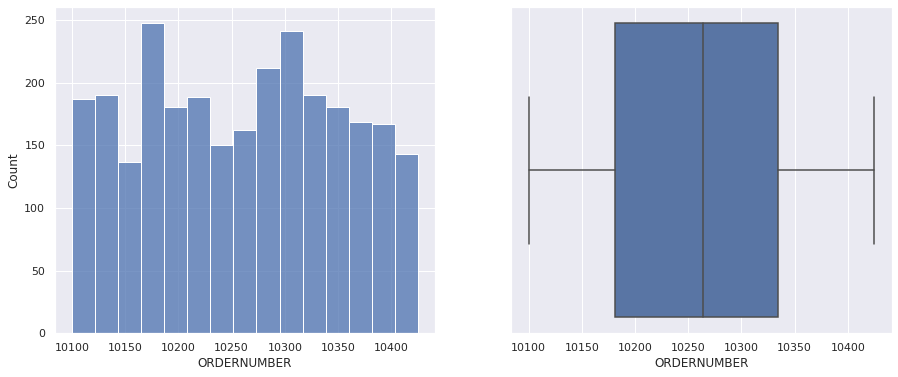

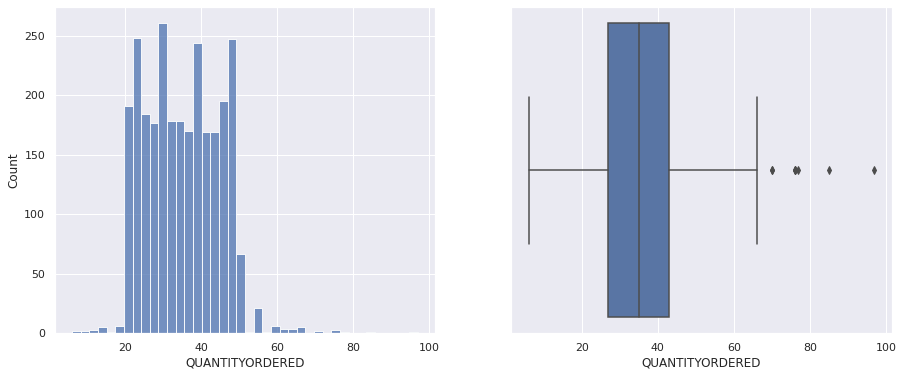

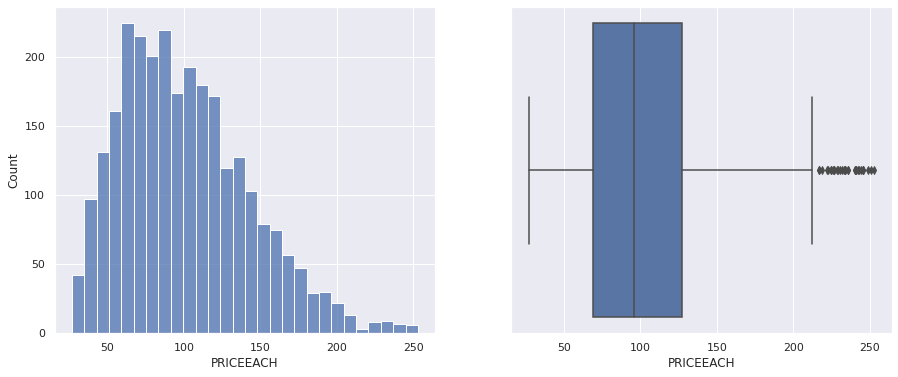

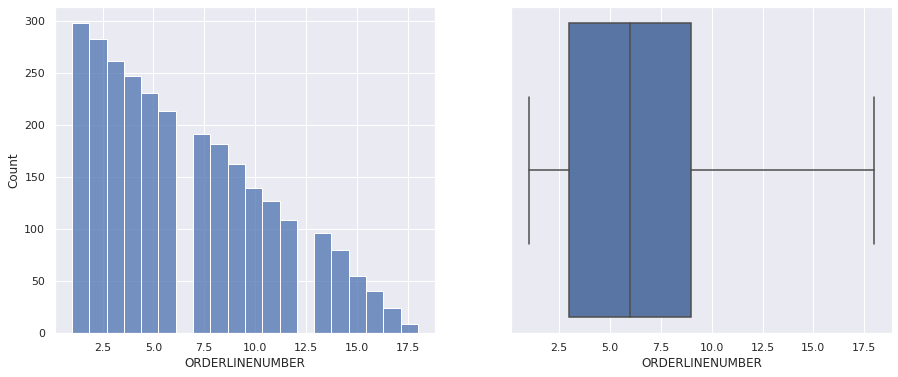

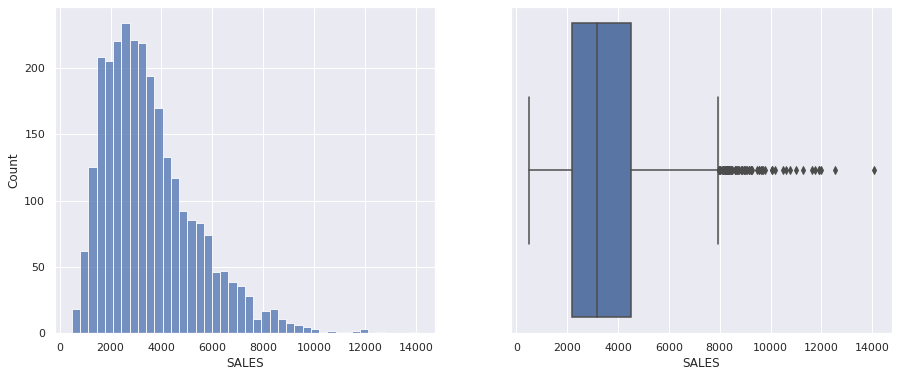

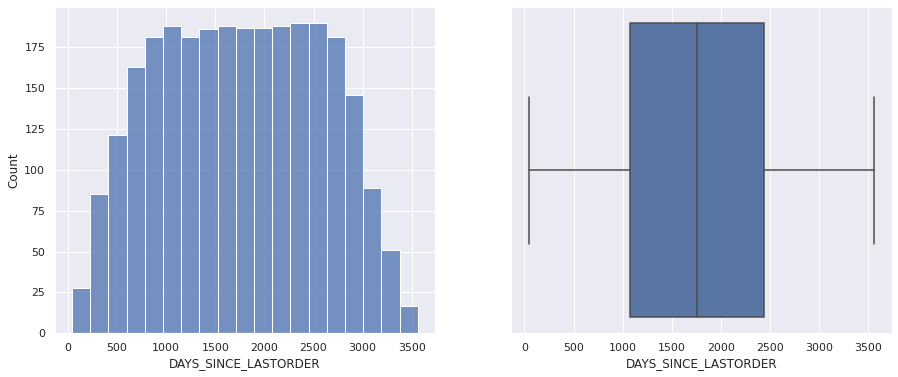

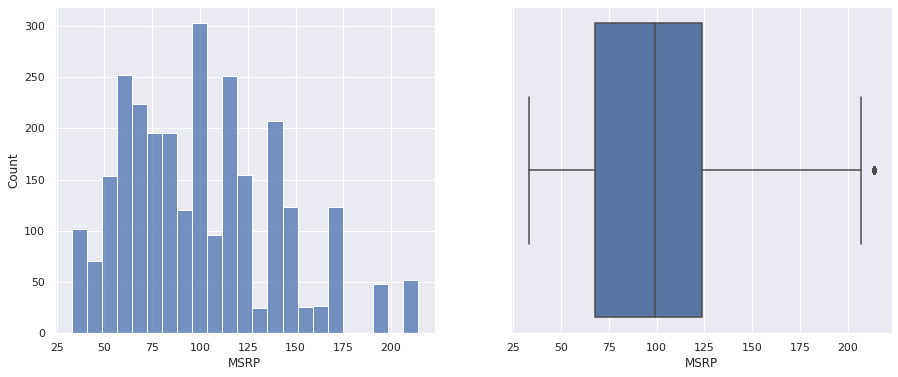

In [ ]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

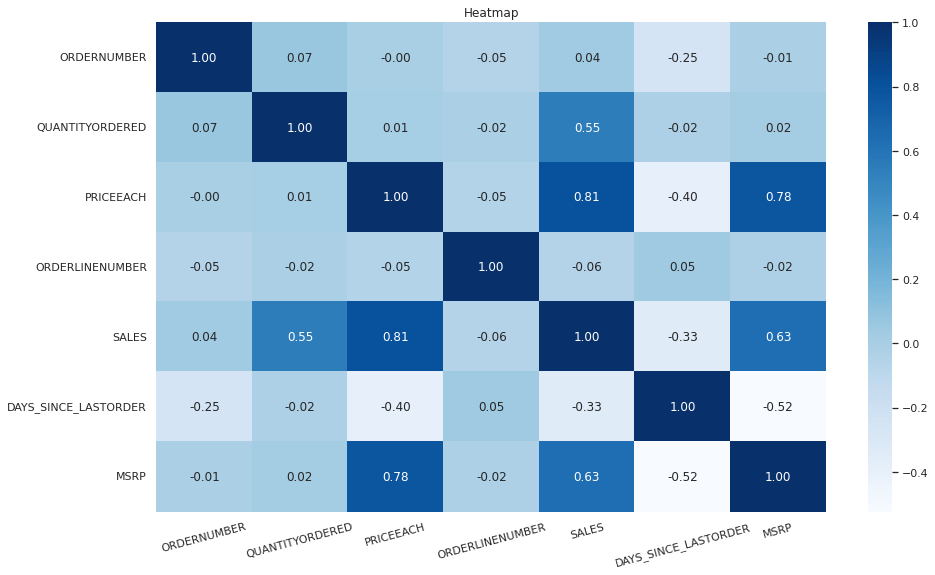

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap')
plt.xticks(rotation=15)
plt.show()

<Figure size 432x144 with 0 Axes>

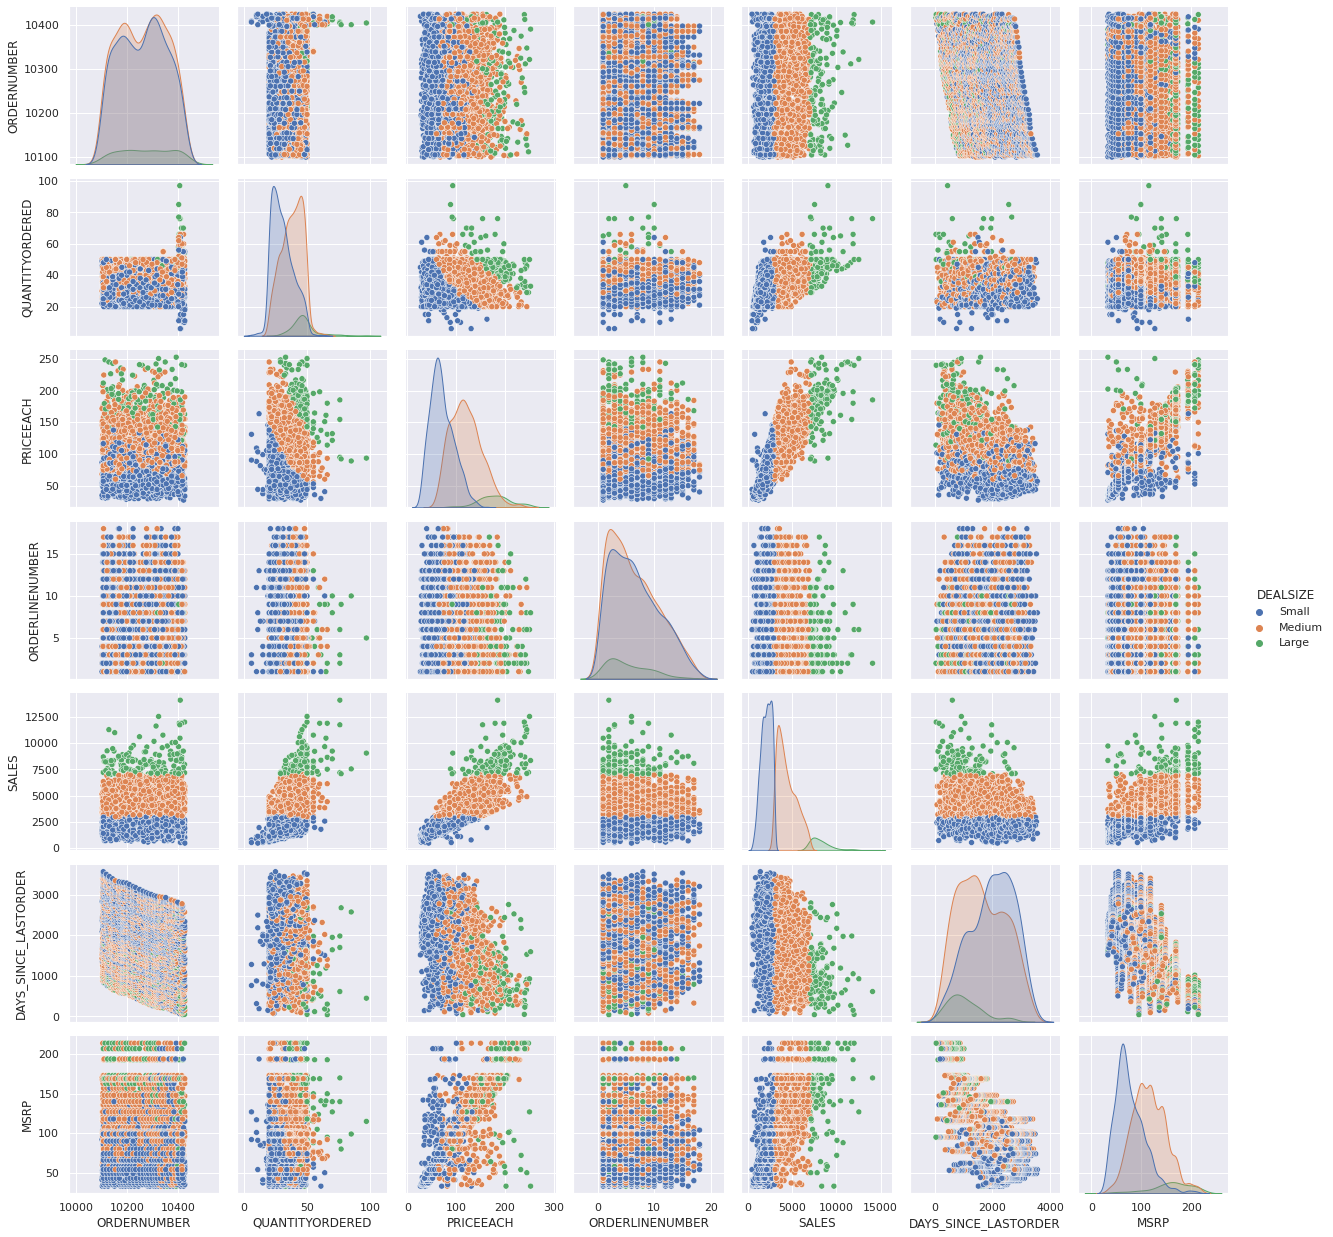

In [ ]:
plt.figure(figsize = (6,2))
sns.pairplot(df,hue='DEALSIZE')

In [ ]:
df1 = pd.read_csv('rfm.csv')

In [ ]:
df1.head()

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Recency,ORDERNUMBER [Binned],SALES [Binned],Recency [Binned],RECENCY,FREQUENCY,MONETARY,Concatenate
0,"AV Stores, Co.",51,34.862745,91.084510,9.019608,3094.270784,51,1803.803922,51,51,...,Victoria,51,197,Bin 4,Bin 1,Bin 3,2,4,1,"2, 4, 1"
1,Alpha Cognac,20,34.350000,101.160000,4.950000,3524.422000,20,2236.200000,20,20,...,Annette,20,65,Bin 1,Bin 2,Bin 1,4,1,2,"4, 1, 2"
2,Amica Models & Co.,26,32.423077,110.852692,7.615385,3619.894615,26,1318.615385,26,26,...,Paolo,26,266,Bin 2,Bin 3,Bin 4,1,2,3,"1, 2, 3"
3,"Anna's Decorations, Ltd",46,31.934783,106.424130,6.434783,3347.741957,46,1463.586957,46,46,...,Anna,46,84,Bin 4,Bin 2,Bin 2,3,4,2,"3, 4, 2"
4,Atelier graphique,7,38.571429,92.238571,2.000000,3454.280000,7,1424.428571,7,7,...,Carine,7,189,Bin 1,Bin 2,Bin 3,2,1,2,"2, 1, 2"


In [1]:
df1[['Concatenate', 'CUSTOMERNAME']].sort_values('Concatenate').head()

NameError: ignored

In [2]:
df1[['Concatenate', 'CUSTOMERNAME']].sort_values('Concatenate').tail()

NameError: ignored